In [ ]:
# @title MIT License

'''
Copyright (c) 2021 Nicholas Kluge

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''

# **What is the general idea behind NN and Supervised Learning?**
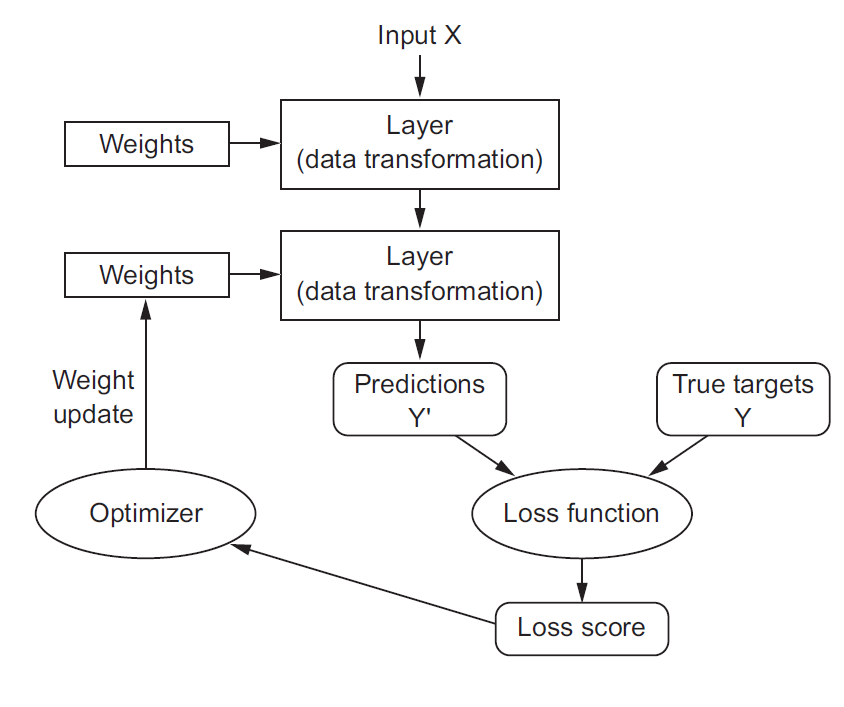

# **What do they look like (mathematically)?**

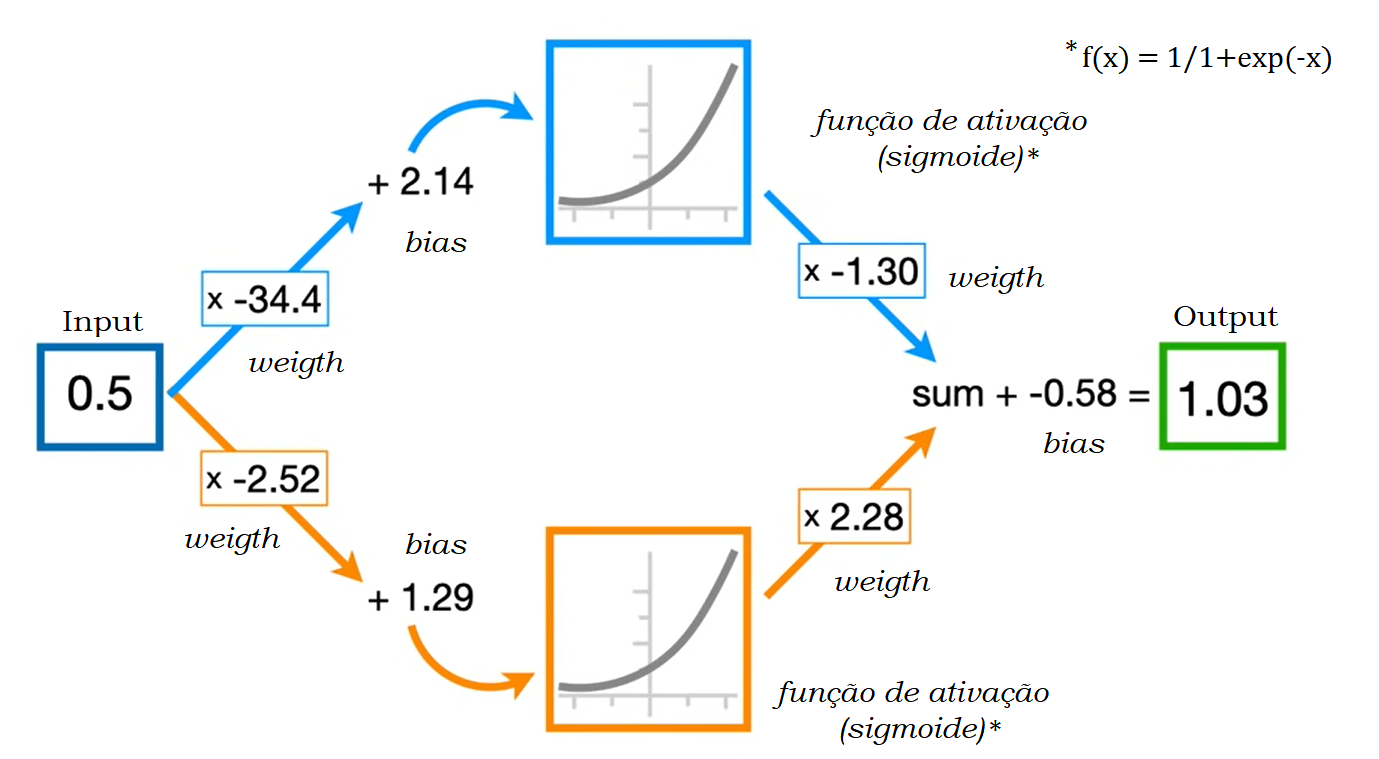

# **What do they look at a high level?**
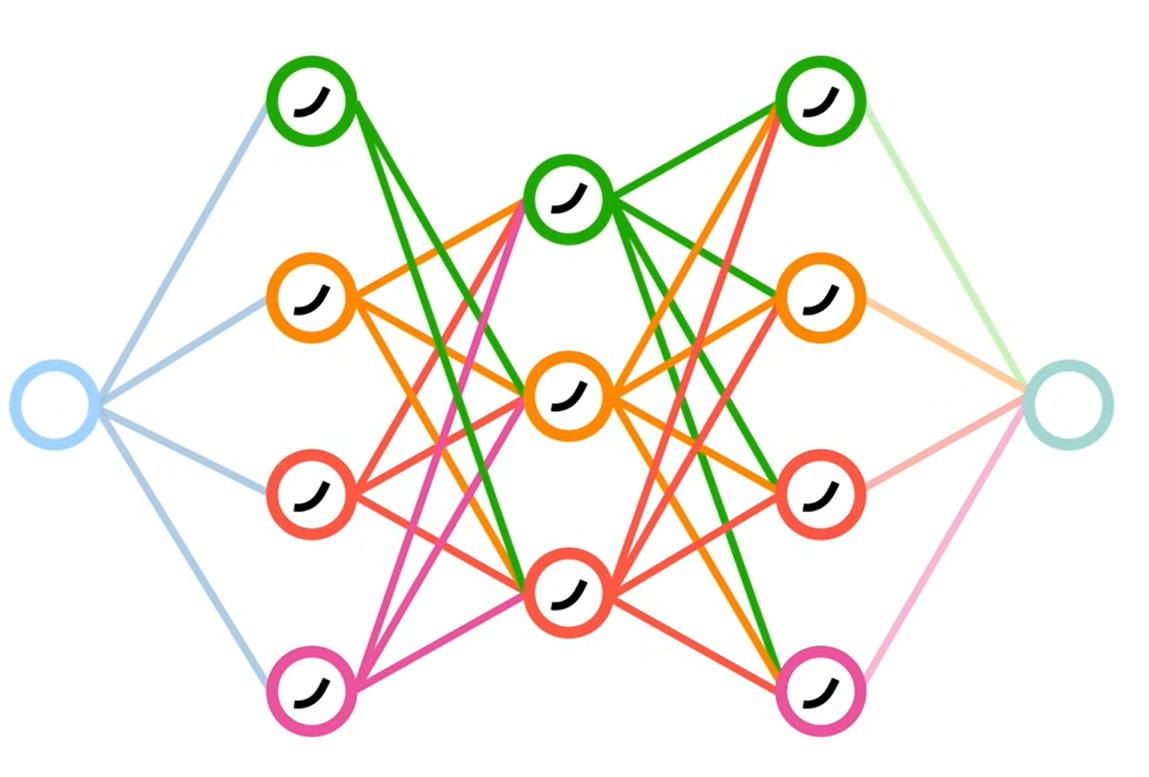


# **Why we use them?**

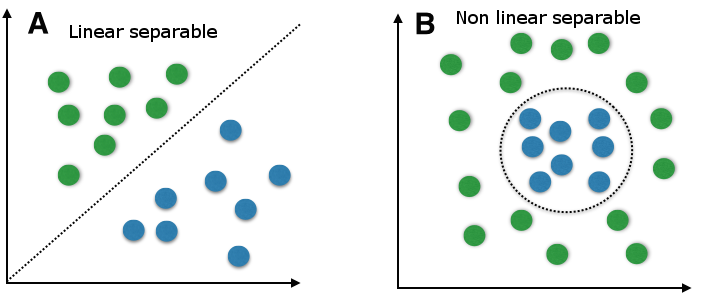
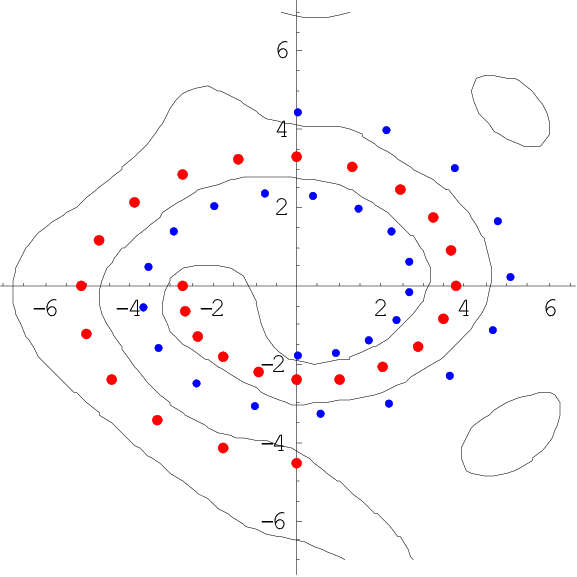

In [ ]:
%!pip install tensorflow
%!pip install keras
%!pip install matplotlib
%!pip install numpy
%!pip install pandas

# Bibliotecas
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import random

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Camisa', 'Calça', 'Blusão', 'Vestido', 'Casaco',
               'Sandália', 'Saia', 'Tênis', 'Bolsa', 'Bota']

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
#Carregue e prepare o conjunto de dados Fashion_MNIST. Normalizamos as amostras (784 valores entre 0 e 255 se tornam 784 entre 0 e 1)

train_images = train_images / 255.0
test_images = test_images / 255.0

#Conjunto de validação
val_images = train_images[:10000]
partial_train_images = train_images[0:50000]

val_labels = train_labels[:10000]
partial_train_labels = train_labels[0:50000]


In [ ]:
print('Tamanho do comjunto de treinamento: '), print(partial_train_images.shape)
print('Tamanho do comjunto de validação: '), print(val_images.shape)
print('Tamanho do comjunto de teste: '), print(test_images.shape)

import pandas as pd

# Alvos/rótulos
df = pd.DataFrame(partial_train_labels, columns =['Rótulos'])
df.head(10)

Tamanho do comjunto de treinamento: 
(50000, 28, 28)
Tamanho do comjunto de validação: 
(10000, 28, 28)
Tamanho do comjunto de teste: 
(10000, 28, 28)


,Rótulos
0,9
1,0
2,0
3,3
4,0
5,2
6,7
7,2
8,5
9,5


Amostras normalizadas: 




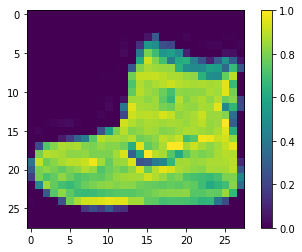

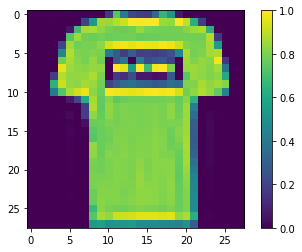

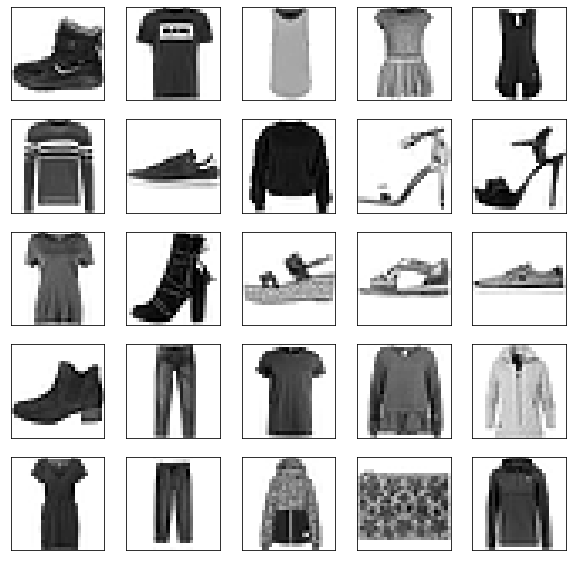

O que a rede "realmente vê": 




(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00392157, 0.        , 0.        , 0.        , 0.        ,
         0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
         0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00392157, 0.        ,
         0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
         0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
         1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
         0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
         0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
         0.

In [ ]:
#Plotagem
print('Amostras normalizadas: ')
print('\n')
plt.figure()
plt.imshow(partial_train_images[0])#mude o valor para plotar uma amostra diferente.
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure()
plt.imshow(partial_train_images[1])#mude o valor para plotar uma amostra diferente.
plt.colorbar()
plt.grid(False)
plt.show()

# Plota as primeiras 25 imagens e suas classes.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(partial_train_images[i], cmap=plt.cm.binary)
plt.show()

#Raw data
print('O que a rede "realmente vê": ')
print('\n')
partial_train_images[1], partial_train_labels[1]

# **Mas o que *é* uma Rede Neural?** [**(3Blue1Brown)**](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)
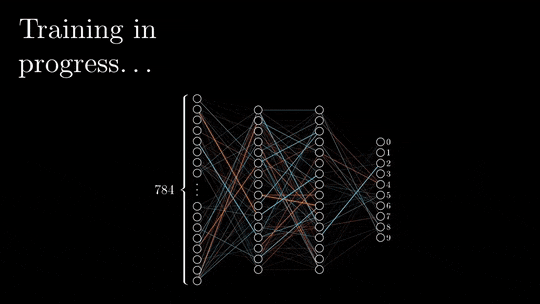

In [ ]:
#@title **Hiperparâmetros (*play with them!*)**
# Camadas ocultas/taxa de aprendizagem/regularizadores/epochs/batch size
HIDDEN_LAYER_01 = 128 #@param {type:"number"} # nº nodos na primeira camada oculta
HIDDEN_LAYER_02 = 128 #@param {type:"number"} # nº nodos na segunda camada oculta
LEARNING_RATE = 0.001 #@param {type:"number"} #taxa de aprendizagem (o tamanho do passo do gradiente)
EPOCHS =   20#@param {type:"number"} #nº de épocas (nº de vezes que todo o conjunto de dados será visto pelo modelo)
BATCH = 128 #@param {type:"number"} nº de exemplos de treinamento utilizados em cada iteração
#Regularizador
DROPOUT_RATE = 0.2 #@param {type:"number"} #proporção de nodos que são ignorados durante treinamento
#Modelo
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), #transforma o input 2D (28 x28) em um array 1D (28*28 = 784)
                                    tf.keras.layers.Dense(HIDDEN_LAYER_01, activation='relu'),#Hidden layer, onde representações são aprendidas (ReLU = rectified linear activation unit)
                                    tf.keras.layers.Dropout(DROPOUT_RATE),
                                    tf.keras.layers.Dense(HIDDEN_LAYER_02, activation='relu'),#Hidden layer, onde representações são aprendidas (ReLU = rectified linear activation unit)
                                    tf.keras.layers.Dropout(DROPOUT_RATE),
                                    tf.keras.layers.Dense(10, activation='softmax')])#Softmax gera uma medida de probabilidade entre as 10 classes

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer = opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trai

# Cross Entropy Loss
Entropia cruzada se refere à **diferença entre duas distribuições de probabilidade** $p$ e $q$ sobre o mesmo conjunto de eventos.

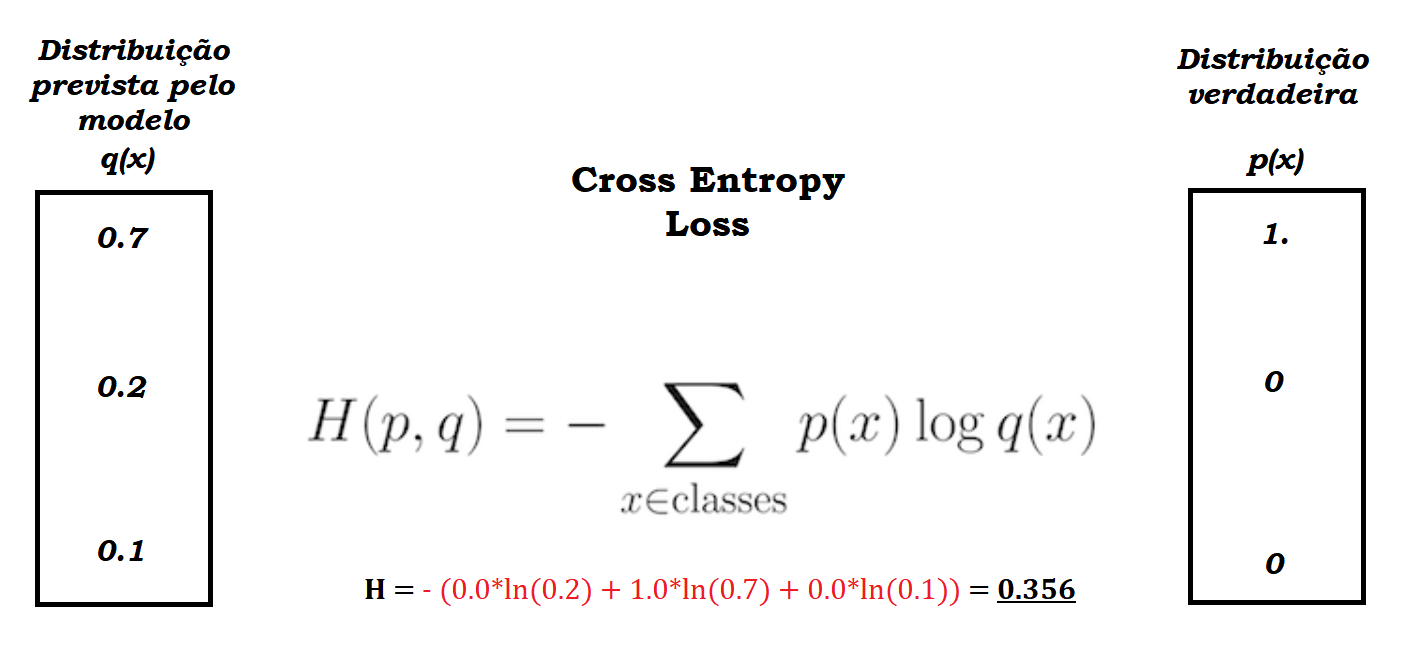



# Método do gradiente (Gradient descent)

Gradiente descendente é um algoritmo de otimização utilizado para se encontrar um **mínimo local de uma função diferençável.** A ideia é dar passos repetidos na direção oposta do gradiente da função no ponto atual.

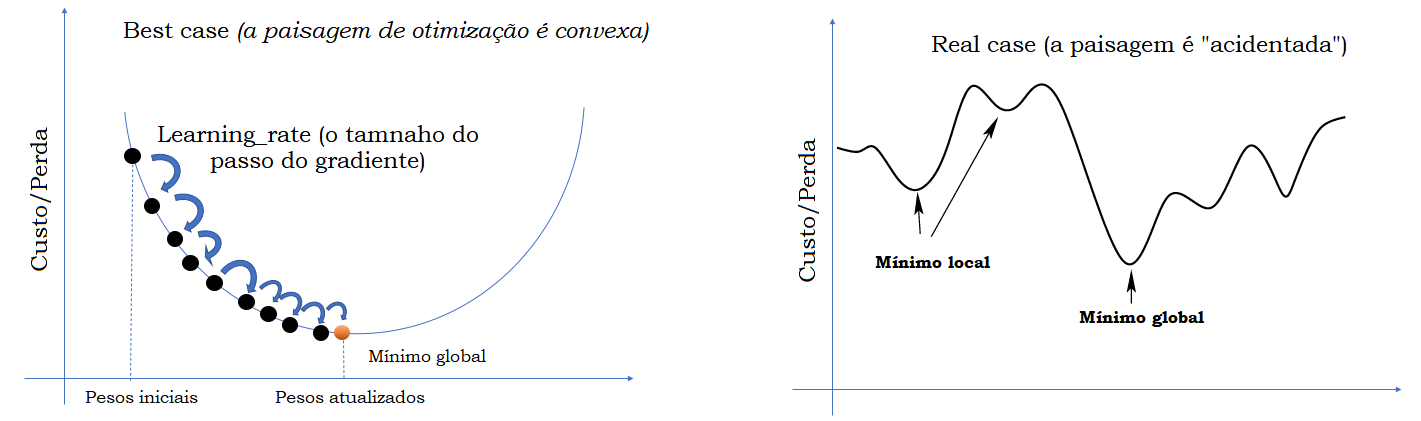

Treinando...


Epoch 1/20
391/391 [==============================] - 3s 6ms/step - loss: 0.6417 - accuracy: 0.7729 - val_loss: 0.4268 - val_accuracy: 0.8511
Epoch 2/20
391/391 [==============================] - 2s 6ms/step - loss: 0.4338 - accuracy: 0.8446 - val_loss: 0.3627 - val_accuracy: 0.8657
Epoch 3/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3945 - accuracy: 0.8576 - val_loss: 0.3303 - val_accuracy: 0.8806
Epoch 4/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3736 - accuracy: 0.8634 - val_loss: 0.3129 - val_accuracy: 0.8829
Epoch 5/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3518 - accuracy: 0.8716 - val_loss: 0.2897 - val_accuracy: 0.8931
Epoch 6/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3350 - accuracy: 0.8769 - val_loss: 0.2841 - val_accuracy: 0.8936
Epoch 7/20
391/391 [==============================] - 2s 6ms/step - loss: 0.3226 - accuracy: 0.8816 - val_loss: 0.2702 - val_accuracy

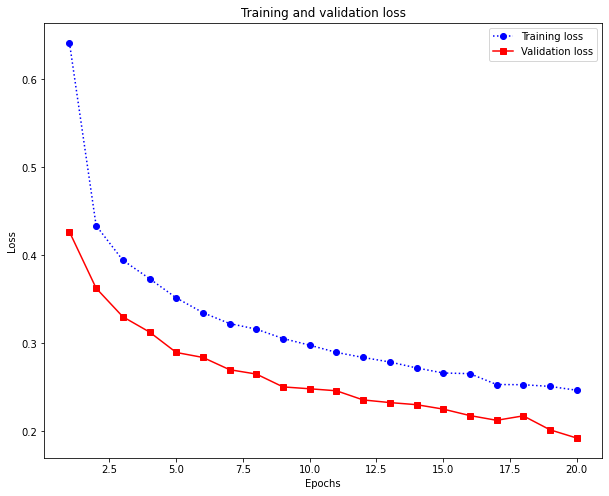

<Figure size 432x288 with 0 Axes>

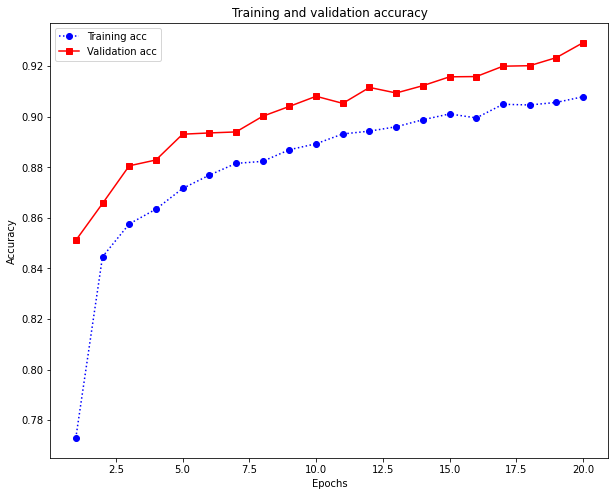

In [ ]:
#Treine e avalie o modelo:
print('Treinando...')
print('\n')
history = model.fit(partial_train_images, partial_train_labels, epochs=EPOCHS, batch_size=BATCH, validation_data=(val_images, val_labels), verbose=1)
print('\n')
print('Avaliando...')
print('\n')
model.evaluate(test_images,  test_labels, verbose=1)

#Salve o modelo
model.save('/content/drive/MyDrive/my_model')
#model = tf.keras.models.load_model('/content/drive/MyDrive/my_model')

#Gráficos de acurácia e loss por tempo(epoch)
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (10,8))
plt.plot(epochs, loss, 'bo:', label='Training loss')
plt.plot(epochs, val_loss, 'rs-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()  

plt.figure(figsize = (10,8))
plt.plot(epochs, acc, 'bo:', label='Training acc')
plt.plot(epochs, val_acc, 'rs-', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
for layer in model.layers:
    weights = layer.get_weights() # aquilo que o modelo "aprendeu"

print('Pesos(weights) aprendidos: ')
print('\n')
weights

Pesos(weights) aprendidos: 




[array([[ 1.77257106e-01, -2.73904353e-01,  1.60751432e-01,
         -2.40884811e-01, -1.18104011e-01, -2.61190720e-02,
          1.79754898e-01, -2.18611598e-01,  2.17256114e-01,
         -3.35768163e-01],
        [ 1.77356958e-01, -3.17065001e-01,  1.20104335e-01,
         -6.61124513e-02,  2.62994885e-01, -2.84937322e-01,
         -2.21142411e-01, -3.90388966e-01,  6.78807274e-02,
         -9.88125056e-02],
        [-1.15679257e-01, -2.70590156e-01, -1.12889946e-01,
         -4.91718948e-03,  5.84664717e-02, -3.91076207e-01,
          6.68698326e-02, -2.48785466e-02,  1.59865454e-01,
         -1.65915936e-01],
        [-2.48757884e-01, -2.36485392e-01, -2.81453375e-02,
         -2.05378141e-02,  2.37083547e-02, -3.50226849e-01,
         -3.29138376e-02,  3.39241594e-01, -2.67193824e-01,
         -5.65811992e-02],
        [ 1.36825323e-01,  1.61856294e-01,  8.08440968e-02,
          1.06215730e-01, -2.54782259e-01, -7.61217713e-01,
          1.29225492e-01, -1.04013026e+00, -2.098848

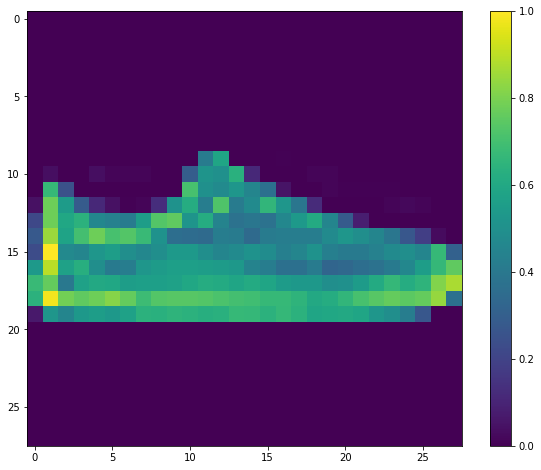

,Camisa,Calça,Blusão,Vestido,Casaco,Sandália,Saia,Tênis,Bolsa,Bota
Distribuição de Probabilidade,0.000,0.000,0.000,0.000,0.000,0.409,0.000,0.585,0.006,0.000


In [ ]:
#@title Escolha qualquer amostra (entre 0 e 9999)
pd.set_option('display.float_format','{:.3f}'.format)

predictions = model.predict(test_images)
sample =  12#@param {type:"number"}
a = predictions[sample] #Distribuição de probabilidade
df = pd.DataFrame(a, index= class_names, columns=['Distribuição de Probabilidade'])
df = df.transpose()

plt.figure(figsize = (10,8))
plt.imshow(test_images[sample])#,cmap=plt.cm.binary
plt.colorbar()
plt.grid(False)
plt.show()

df


# Escolher a função objetiva certa para o problema certo é extremamente importante: **sua rede tomará qualquer atalho que puder para minimizar a perda**; assim, se o objetivo não estiver totalmente correlacionado com o sucesso da tarefa em questão, sua rede acabará fazendo coisas que você talvez não tenha desejado. 

#Imagine uma IA estúpida e onipotente treinada via SGD, com a seguinte função objetiva mal escolhida: **“maximizar o bem-estar médio de todos os seres humanos vivos”**. Para facilitar seu trabalho, esta IA poderia escolher matar todos os humanos, exceto alguns, e se concentrar no bem-estar dos demais *- porque o bem-estar médio não é afetado por quantos humanos restam.* Isso pode não ser o que você pretendia! 

#Basta lembrar que **todas as redes neurais que você construir serão igualmente implacáveis na redução de sua função de perda** - então escolha o objetivo *sabiamente*, ou você terá que lidar com efeitos colaterais indesejados.

# $-$ François Chollet (creator of the Keras Library), [*Deep Learning with Python*](https://tanthiamhuat.files.wordpress.com/2018/03/deeplearningwithpython.pdf)